In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from textstat.textstat import *
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chakri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Chakri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv("HateSpeechData.csv")
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
df['tweet length'] = df['tweet'].apply(len)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137


In [5]:
tweet=df['tweet']

In [7]:
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["ff","#ff",  "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()
def preprocess(tweet):  
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_lower = newtweet.str.lower()
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    return tweets_p
print(" StopWords list: ",stopwords)
preprocessed_tweets = preprocess(tweet)   
df['preprocessed_tweets'] = preprocessed_tweets
df[["tweet","preprocessed_tweets"]]

 StopWords list:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

,tweet,preprocessed_tweets
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie right tl trash mine bibl scriptur hymn
24779,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart babi drove redneck crazi
24780,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [7]:
tfidf_v = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = tfidf_v.fit_transform(df['preprocessed_tweets'] )
tfidf

<24783x6441 sparse matrix of type '<class 'numpy.float64'>'
	with 189618 stored elements in Compressed Sparse Row format>

In [8]:
X = tfidf
y = df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score=accuracy_score(y_test,y_preds)
print("The accuracy of Logistic Regression is: " , score)

              precision    recall  f1-score   support

           0       0.60      0.18      0.27       370
           1       0.92      0.97      0.94      4818
           2       0.84      0.85      0.85      1008

    accuracy                           0.90      6196
   macro avg       0.79      0.67      0.69      6196
weighted avg       0.89      0.90      0.89      6196

The accuracy of Logistic Regression is:  0.9004196255648805


C:\Users\Chakri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score2=accuracy_score(y_test,y_preds)
print("The accuracy of Random Forest Classifier is: " , score2)

              precision    recall  f1-score   support

           0       0.56      0.17      0.26       370
           1       0.93      0.96      0.94      4818
           2       0.82      0.92      0.86      1008

    accuracy                           0.90      6196
   macro avg       0.77      0.68      0.69      6196
weighted avg       0.89      0.90      0.89      6196

The accuracy of Random Forest Classifier is:  0.9039703034215623


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = GaussianNB()
model.fit(X_train.toarray(),y_train)
y_preds = model.predict(X_test.toarray())
report = classification_report( y_test, y_preds )
print(report)
score3=accuracy_score(y_test,y_preds)
print("The accuracy of Naive Bayes Classifier is: " , score3)

              precision    recall  f1-score   support

           0       0.12      0.45      0.19       370
           1       0.91      0.69      0.79      4818
           2       0.55      0.64      0.59      1008

    accuracy                           0.67      6196
   macro avg       0.53      0.59      0.52      6196
weighted avg       0.80      0.67      0.72      6196

The accuracy of Naive Bayes Classifier is:  0.6691413815364752


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LinearSVC(random_state=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score4=accuracy_score(y_test,y_preds)
print("The accuracy of Linear SVC is: " , score4)

              precision    recall  f1-score   support

           0       0.52      0.24      0.32       370
           1       0.93      0.95      0.94      4818
           2       0.82      0.86      0.84      1008

    accuracy                           0.90      6196
   macro avg       0.75      0.68      0.70      6196
weighted avg       0.88      0.90      0.89      6196

The accuracy of Linear SVC is:  0.8957391865719819


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score5=accuracy_score(y_test,y_preds)
print("The accuracy of Decision Tree Classifier is: " , score5)

              precision    recall  f1-score   support

           0       0.32      0.26      0.29       370
           1       0.93      0.93      0.93      4818
           2       0.82      0.86      0.84      1008

    accuracy                           0.88      6196
   macro avg       0.69      0.68      0.69      6196
weighted avg       0.87      0.88      0.88      6196

The accuracy of Decision Tree Classifier is:  0.8802453195610072


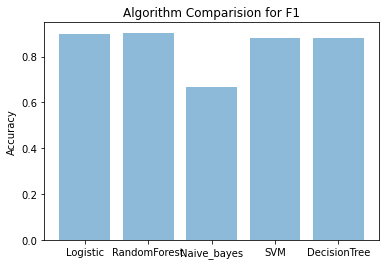

In [16]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM','DecisionTree')
y_pos = np.arange(len(objects))
performance = [score,score2,score3,score4,score5]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

In [17]:
sentiment_analyzer = sia()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)

new_features = pd.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],
                             'Compound':final_features[:,3],'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.120,0.880,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.538,0.000,0.462,-0.9550,0.0,2.0,0.0
3,0.000,0.344,0.656,0.5673,0.0,2.0,0.0
4,0.249,0.081,0.669,-0.7762,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.454,0.000,0.546,-0.8074,0.0,0.0,0.0
24780,0.000,0.219,0.781,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [19]:
tfidf_2 = tfidf.toarray()
modeling_features = np.concatenate([tfidf_2,final_features],axis=1)
modeling_features.shape

(24783, 6448)

In [20]:
X = pd.DataFrame(modeling_features)
y = df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score=accuracy_score(y_test,y_preds)
print("The accuracy of Logistic Regression is: " , score)

              precision    recall  f1-score   support

           0       0.59      0.19      0.28       370
           1       0.92      0.96      0.94      4818
           2       0.84      0.86      0.85      1008

    accuracy                           0.90      6196
   macro avg       0.78      0.67      0.69      6196
weighted avg       0.89      0.90      0.89      6196

The accuracy of Logistic Regression is:  0.9010652033570046


C:\Users\Chakri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score2=accuracy_score(y_test,y_preds)
print("The accuracy of Random Forest Classifier is: " , score2)

              precision    recall  f1-score   support

           0       0.58      0.11      0.19       370
           1       0.91      0.97      0.94      4818
           2       0.83      0.83      0.83      1008

    accuracy                           0.89      6196
   macro avg       0.77      0.64      0.65      6196
weighted avg       0.88      0.89      0.88      6196

The accuracy of Random Forest Classifier is:  0.8931568754034861


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = GaussianNB()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score3=accuracy_score(y_test,y_preds)
print("The accuracy of Naive Bayes Classifier is: " , score3)

              precision    recall  f1-score   support

           0       0.12      0.45      0.19       370
           1       0.91      0.69      0.79      4818
           2       0.55      0.64      0.59      1008

    accuracy                           0.67      6196
   macro avg       0.53      0.59      0.52      6196
weighted avg       0.80      0.67      0.72      6196

The accuracy of Naive Bayes Classifier is:  0.6693027759845062


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LinearSVC(random_state=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score4=accuracy_score(y_test,y_preds)
print("The accuracy of Linear SVC is: " , score4)

              precision    recall  f1-score   support

           0       0.52      0.25      0.34       370
           1       0.93      0.95      0.94      4818
           2       0.82      0.88      0.85      1008

    accuracy                           0.90      6196
   macro avg       0.76      0.69      0.71      6196
weighted avg       0.89      0.90      0.89      6196

The accuracy of Linear SVC is:  0.8979987088444158


C:\Users\Chakri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score5=accuracy_score(y_test,y_preds)
print("The accuracy of Decision Tree Classifier is: " , score5)

              precision    recall  f1-score   support

           0       0.30      0.24      0.26       370
           1       0.93      0.94      0.93      4818
           2       0.83      0.85      0.84      1008

    accuracy                           0.88      6196
   macro avg       0.68      0.67      0.68      6196
weighted avg       0.87      0.88      0.88      6196

The accuracy of Decision Tree Classifier is:  0.881213686249193


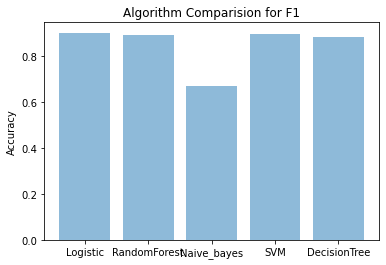

In [25]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM','DecisionTree')
y_pos = np.arange(len(objects))
performance = [score,score2,score3,score4,score5]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()

In [26]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["preprocessed_tweets"].apply(lambda x: x.split(" ")))]
model = Doc2Vec(documents ,vector_size=5, window=2, min_count=1, workers=4)
doc2vec_df = df["preprocessed_tweets"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,0.037618,-0.006811,0.022569,-0.123213,0.080006
1,-0.060873,0.050323,0.138000,0.084446,-0.103823
2,-0.013880,0.209109,-0.041905,-0.043280,0.035917
3,0.046911,0.127686,0.090979,0.057969,0.083035
4,-0.013062,0.032488,0.138343,-0.165039,-0.182509
...,...,...,...,...,...
24778,0.278782,0.189622,0.405845,-0.078538,-0.100875
24779,-0.149152,0.093575,0.143740,-0.059088,-0.029947
24780,-0.217872,0.283467,0.143595,0.174069,-0.128655
24781,-0.045130,0.046020,0.106284,-0.068564,-0.045444


In [27]:
modeling_features = np.concatenate([tfidf_2,final_features,doc2vec_df],axis=1)
modeling_features.shape

(24783, 6453)

In [28]:
X = pd.DataFrame(modeling_features)
y = df['class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression().fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score=accuracy_score(y_test,y_preds)
print("The accuracy of Logistic Regression is: " , score)

              precision    recall  f1-score   support

           0       0.59      0.20      0.30       370
           1       0.92      0.96      0.94      4818
           2       0.83      0.86      0.85      1008

    accuracy                           0.90      6196
   macro avg       0.78      0.67      0.69      6196
weighted avg       0.89      0.90      0.89      6196

The accuracy of Logistic Regression is:  0.8999354422207876


C:\Users\Chakri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score2=accuracy_score(y_test,y_preds)
print("The accuracy of Random Forest Classifier is: " , score2)

              precision    recall  f1-score   support

           0       0.65      0.09      0.15       370
           1       0.90      0.97      0.93      4818
           2       0.83      0.79      0.81      1008

    accuracy                           0.89      6196
   macro avg       0.79      0.62      0.63      6196
weighted avg       0.87      0.89      0.87      6196

The accuracy of Random Forest Classifier is:  0.8879922530664945


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = GaussianNB()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score3=accuracy_score(y_test,y_preds)
print("The accuracy of Naive Bayes Classifier is: " , score3)

              precision    recall  f1-score   support

           0       0.12      0.45      0.19       370
           1       0.91      0.69      0.79      4818
           2       0.55      0.64      0.59      1008

    accuracy                           0.67      6196
   macro avg       0.53      0.59      0.52      6196
weighted avg       0.80      0.67      0.72      6196

The accuracy of Naive Bayes Classifier is:  0.6693027759845062


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LinearSVC(random_state=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score4=accuracy_score(y_test,y_preds)
print("The accuracy of Linear SVC is: " , score4)

              precision    recall  f1-score   support

           0       0.52      0.25      0.34       370
           1       0.93      0.95      0.94      4818
           2       0.82      0.87      0.85      1008

    accuracy                           0.90      6196
   macro avg       0.76      0.69      0.71      6196
weighted avg       0.89      0.90      0.89      6196

The accuracy of Linear SVC is:  0.8978373143963848


C:\Users\Chakri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
report = classification_report( y_test, y_preds )
print(report)
score5=accuracy_score(y_test,y_preds)
print("The accuracy of Decision Tree Classifier is: " , score5)

              precision    recall  f1-score   support

           0       0.32      0.28      0.30       370
           1       0.93      0.92      0.93      4818
           2       0.80      0.85      0.83      1008

    accuracy                           0.87      6196
   macro avg       0.68      0.69      0.68      6196
weighted avg       0.87      0.87      0.87      6196

The accuracy of Decision Tree Classifier is:  0.8745965138799225


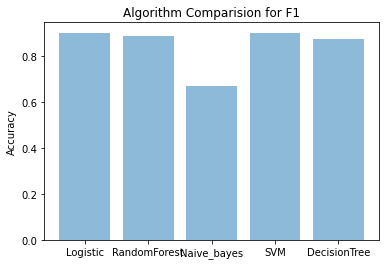

In [34]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM','DecisionTree')
y_pos = np.arange(len(objects))
performance = [score,score2,score3,score4,score5]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()